## Problem Identification:- 
### Employing K-Means Clustering to analyze online shoppers' intent requires optimizing the number of clusters and evaluating clustering effectiveness. Further challenges include interpreting the correlation between features, handling temporal dynamics, and enhancing model interpretability for actionable insights into user segmentation and revenue prediction, that is setting up cluster with similar kind of customers. Additionally, robust model selection and cross-validation how many customers were we been able to label correctly.

## Importing Liberaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

## Loading The Dataset

In [2]:
df = pd.read_csv("C://Users//HP//Documents//Final Project DA//online_shoppers_intention.csv")

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### About the Dataset:-

#### The dataset encompasses feature vectors derived from 12,330 distinct user sessions, each representing a unique user's online activity over a 1-year period. This intentional diversity across sessions aims to mitigate biases related to specific campaigns, special days, user profiles, or temporal trends. The dataset is comprised of 10 numerical and 8 categorical attributes, with the 'Revenue' attribute serving as the class label.

### Data Origin and Considerations:-

#### 1. Feature values are derived from user interactions with different types of website pages.
#### 2. The dataset is intentionally diverse to avoid biases related to specific user profiles, campaigns, or temporal patterns.
#### 3. Special attention is given to metrics like Bounce Rate, Exit Rate, and Page Value from "Google Analytics."
#### 4. The 'Special Day' feature incorporates considerations of e-commerce dynamics, such as order and delivery date durations.
#### 5. Operating system, browser, region, and traffic type provide additional context about user behavior.
#### 6. The dataset encompasses a mix of numerical and categorical features, making it suitable for various analytical approaches.

#### This comprehensive dataset offers insights into user behavior, web page interactions, and the potential for e-commerce transactions, making it valuable for exploratory data analysis and predictive modeling.

### Attribute Information:-

#### 'Revenue'(CATEGORICAL) attribute can be used as the class label which tells that customer Buys or not Buys any product.

#### "Administrative"(website home|starting page), "Administrative Duration", "Informational"(Website page which gives latest news & info regarding the company) , "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. ""The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.""

#### The "Bounce Rate", "Exit Rate" & "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page,the percentage that were the last in the session. *The value of "Page Value" feature represents the average value for a web page that a user visited before completing e-commerce transaction.

#### The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. ""For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.""

#### "operating system" feature having 4 different OS.

#### "Region" feature having values from 1-9,customers belonging to 9 different regions.

#### "Browswer" feature showing 4 different browser's used(for Ex. Firefox,Chrome,internet explorer & opera)

#### "Traffic Type" feature having values from 1-20.

#### "visitor type"(CATEGORICAL) as returning(old) or new visitor.

#### "Weekend"(CATEGORICAL) Boolean value indicating whether the date of the visit is weekend or not.

#### "Month"(CATEGORICAL) represents month of the year.




---

## Data Exploration and Data Preprocessing

In [4]:
#Checking Datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
print("Number of Rows: ",df.shape[0])
print("Number of Columns: ",df.shape[1])

Number of Rows:  12330
Number of Columns:  18


In [6]:
#Finding Null Values

df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
#Droping Duplicate Values

df.drop_duplicates(inplace=True)

In [8]:
#Checking the number of rows and columns after droping duplicate values

print("Number of Rows: ",df.shape[0])
print("Number of Columns: ",df.shape[1])

Number of Rows:  12205
Number of Columns:  18


In [9]:
#Getting a description of the dataset

df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942,2.124211,2.357804,3.153298,4.073904
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666,0.906823,1.710114,2.402340,4.016654
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


#### Getting the description of the data: The summary statistics obtained here provide insights into the distribution and central tendencies of each feature, helping us understand the data's characteristics and potential outliers. For example, we could observe the range of values, the typical duration spent on pages, and the prevalence of special day visits.


In [10]:
#Correlation Matrix

round(df.corr(),2)

C:\Users\HP\AppData\Local\Temp\ipykernel_9900\4194024554.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  round(df.corr(),2)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.00,0.60,0.38,0.25,0.43,0.37,-0.21,-0.31,0.10,-0.10,-0.01,-0.03,-0.01,-0.03,0.02,0.14
Administrative_Duration,0.60,1.00,0.30,0.24,0.29,0.35,-0.14,-0.20,0.07,-0.07,-0.01,-0.02,-0.01,-0.01,0.01,0.09
Informational,0.38,0.30,1.00,0.62,0.37,0.39,-0.11,-0.16,0.05,-0.05,-0.01,-0.04,-0.03,-0.04,0.03,0.09
Informational_Duration,0.25,0.24,0.62,1.00,0.28,0.35,-0.07,-0.10,0.03,-0.03,-0.01,-0.02,-0.03,-0.03,0.02,0.07
ProductRelated,0.43,0.29,0.37,0.28,1.00,0.86,-0.19,-0.29,0.05,-0.03,0.00,-0.01,-0.04,-0.04,0.01,0.16
ProductRelated_Duration,0.37,0.35,0.39,0.35,0.86,1.00,-0.17,-0.25,0.05,-0.04,0.00,-0.01,-0.03,-0.04,0.00,0.15
BounceRates,-0.21,-0.14,-0.11,-0.07,-0.19,-0.17,1.00,0.90,-0.12,0.09,0.03,-0.02,0.00,0.09,-0.03,-0.15
ExitRates,-0.31,-0.20,-0.16,-0.10,-0.29,-0.25,0.90,1.00,-0.17,0.12,0.02,-0.00,-0.00,0.09,-0.05,-0.20
PageValues,0.10,0.07,0.05,0.03,0.05,0.05,-0.12,-0.17,1.00,-0.06,0.02,0.05,0.01,0.01,0.01,0.49
SpecialDay,-0.10,-0.07,-0.05,-0.03,-0.03,-0.04,0.09,0.12,-0.06,1.00,0.01,0.00,-0.02,0.05,-0.02,-0.08


### The correlation matrix here provided insights into the relationships between different variables in the dataset, helping us to identify patterns and potential areas for further analysis. Some observations and inferences based on the values obtained are:-

#### 1. Positive Correlations: There is a positive correlation between Administrative and Administrative_Duration (correlation coefficient: 0.60), suggesting that as the number of administrative pages visited increases, the corresponding duration also tends to increase. Similarly, there are positive correlations between various pairs of page types (Administrative, Informational, ProductRelated) and their corresponding durations.

#### 2. Page Values and Revenue: The PageValues variable shows a moderate positive correlation with Revenue (correlation coefficient: 0.49), indicating that higher page values are associated with a higher likelihood of generating revenue. This suggests that users who view pages with higher economic value are more likely to make a purchase.

#### 3. Bounce Rates and Exit Rates: BounceRates and ExitRates have a strong positive correlation (correlation coefficient: 0.90), suggesting that pages with high bounce rates also tend to have high exit rates. This may indicate that pages with a high bounce rate are likely to be exit pages as well.

#### 4. Operating Systems and Browsers: There is a positive correlation between OperatingSystems and Browser (correlation coefficient: 0.21), indicating a weak association between the user's operating system and browser. This could mean that certain combinations of operating systems and browsers are more common among users.

#### 5. Weekend and Revenue: There is a slight positive correlation between Weekend and Revenue (correlation coefficient: 0.03). This suggests a weak association between weekend visits and revenue, implying that revenue might slightly increase on weekends.

 #### 6. Special Day and Other Variables: SpecialDay has weak negative correlations with some variables, indicating a slight decrease in certain activities on special days. For example, there is a negative correlation with PageValues, suggesting that page values might be slightly lower on special days.

#### 7. TrafficType and Other Variables: TrafficType shows some weak correlations with other variables. For example, there is a weak positive correlation with PageValues and a weak negative correlation with SpecialDay.

#### 8. Region and Other Variables: Region has very weak correlations with other variables, indicating a lack of strong association with the variables in the dataset.


C:\Users\HP\AppData\Local\Temp\ipykernel_9900\2876139199.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


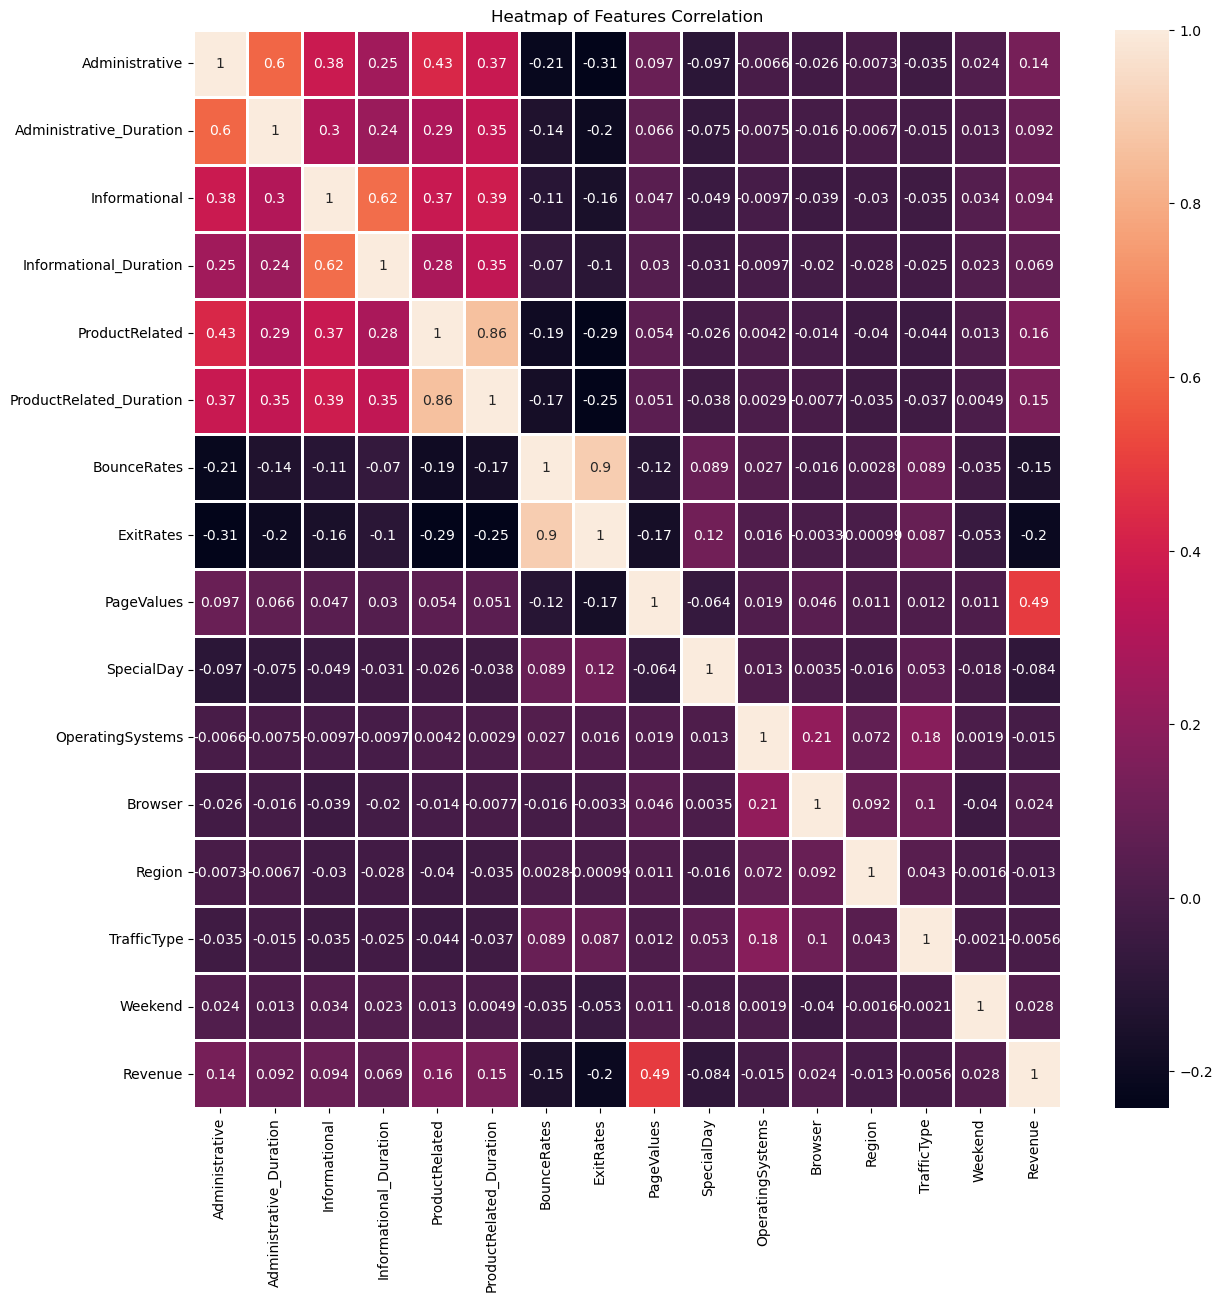

In [11]:
corr=df.corr()
plt.subplots(figsize = (14,14))
plt.title('Heatmap of Features Correlation')
hmap = sns.heatmap(corr, linewidth=1,annot=True,linecolor='white',robust=True)
plt.show()

### Heatmap:-
#### In the context of the correlation matrix obtained earlier, the heatmap visually represents the correlations between different pairs of variables using colours. The typical colour scale ranges from cool colours (e.g., blue) for negative correlations to warm colours (e.g., red) for positive correlations. The intensity of the colour indicates the strength of the correlation, with darker shades representing stronger correlations.


In [12]:
# checing the distribution of revenue

df['Revenue'].value_counts()

False    10297
True      1908
Name: Revenue, dtype: int64

### Checking the distribution of revenue:-

#### In the context of ecommerce or website analytics, the "Revenue" column is a binary variable indicating whether a particular interaction or visit to the website resulted in a revenue generating transaction (True) or not (False). 

#### Out of the total instances (which is the sum of False and True counts, i.e., 10,297 + 1,908 = 12,205), 1,908 instances resulted in revenue, while 10,297 instances did not. This information was instrumental in understanding the distribution of revenue generating interactions versus non revenue generating interactions in the dataset.


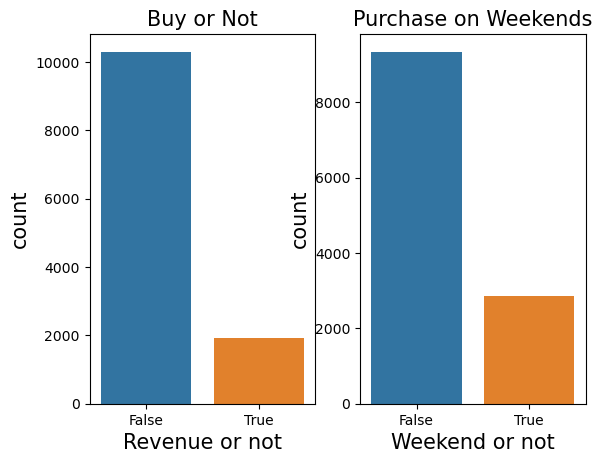

In [13]:
# checking the Distribution of customers on Revenue(Buy or Not Buy)

plt.subplot(1, 2, 1)
b= sns.countplot(x='Revenue', data=df)
plt.title('Buy or Not', fontsize = 15)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)


# checking the Distribution of customers on Weekend( Customers buy on weekend or not)
plt.subplot(1, 2, 2)
c= sns.countplot(x='Weekend', data=df)
plt.title('Purchase on Weekends', fontsize = 15)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

### Checking the Distribution of customers on Revenue(Buy or Not Buy) and Checking the Distribution of customers on Weekend( Customers buy on weekend or not):-

#### The first plot shows the distribution of customers based on whether they made a purchase ("Revenue") or not. Two categories are present: False (Not Buy) and True (Buy). The majority of instances fall under the category of "Not Buy" (Revenue=False), as evident from the higher count on the 'False' bar. The number of instances where customers made a purchase (Revenue=True) is comparatively lower but still significant.

#### The second plot shows the distribution of customers based on whether they made a purchase on weekends (Weekend). Two categories are present: False (Not on Weekend) and True (On Weekend). 

#### Combining insights from both plots, we could analyze patterns such as whether revenue generation was more prevalent on weekends or weekdays.


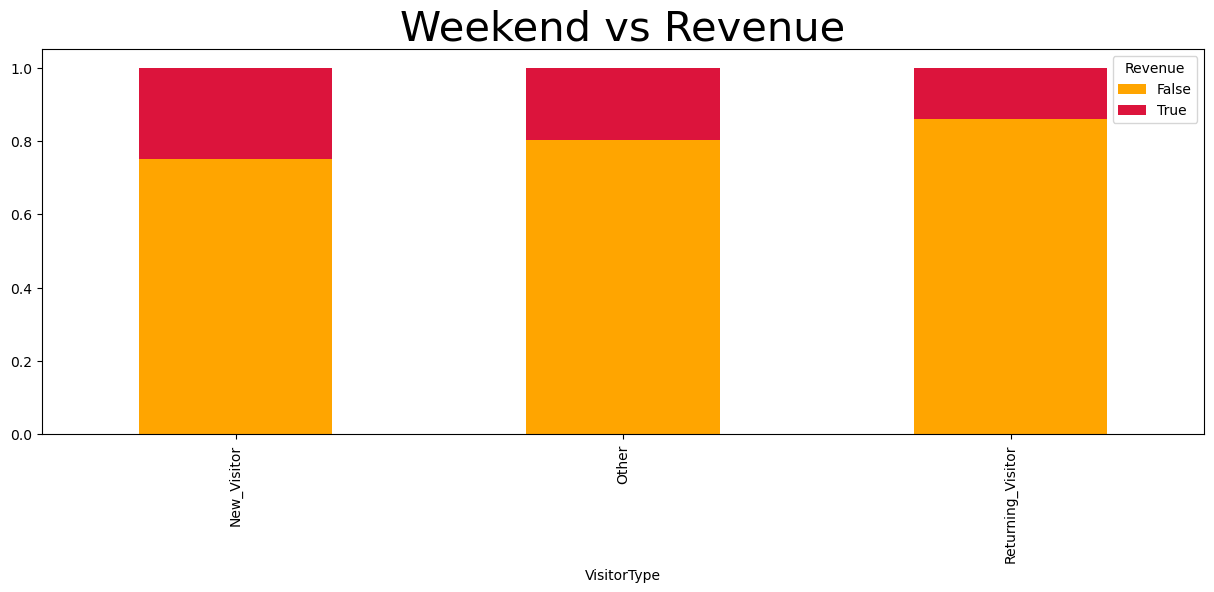

In [14]:
#Weekend vs Revenue

df_1 = pd.crosstab(df['VisitorType'], df['Revenue'])
df_1.div(df_1.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['orange', 'crimson'])
plt.title('Weekend vs Revenue', fontsize = 30)
plt.show()

### Weekend Vs Revenue:-

#### The plot obtained represented the distribution of revenue across different visitor types (e.g., returning visitors, new visitors) and whether revenue was generated or not. The bars are divided into two colours: orange, representing instances where revenue was not generated (Revenue=False), and crimson, representing instances where revenue was generated (Revenue=True).

#### Each bar on the plot represented a different "VisitorType," and the height of the bar indicated the proportion of instances for that visitor type. The stacked bars provide a visual comparison of the proportion of revenue and nonrevenue instances within each visitor type.The plot allowed us to observe whether certain visitor types have a higher likelihood of generating revenue.


Text(0.5, 1.0, 'VisitorType vs Revenue')

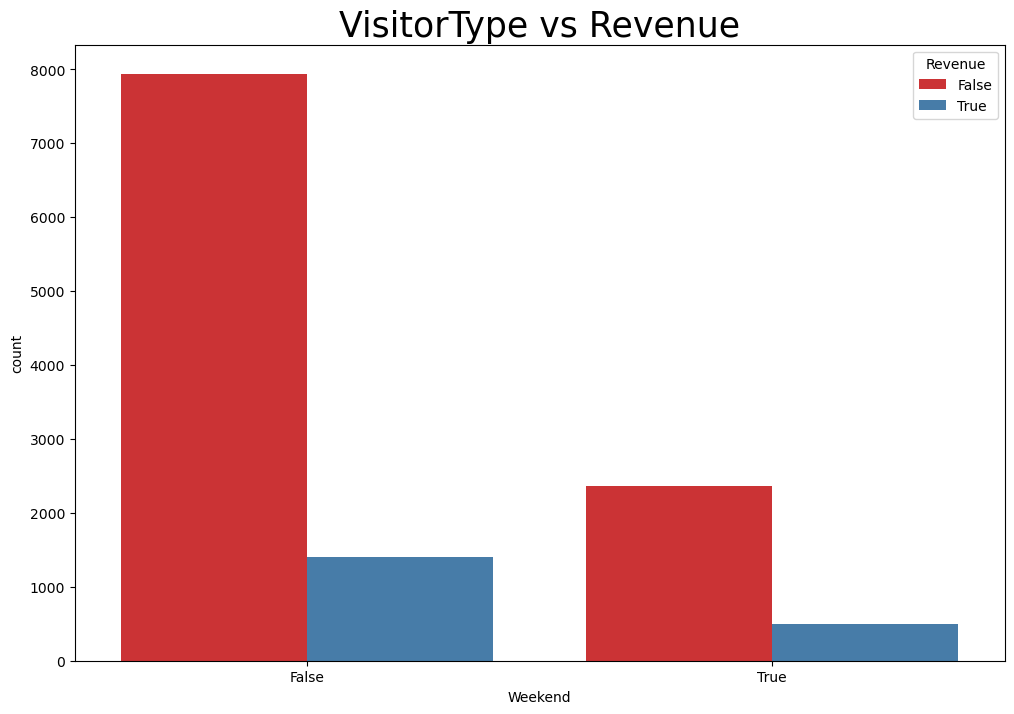

In [15]:
#VisitorType vs Revenue

fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="Weekend", data=df,hue='Revenue',palette='Set1',ax=ax)
plt.title('VisitorType vs Revenue', fontsize = 25)

In [16]:
df.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False


#### For clustering we do not need labels. Because we'll identify the labels. Here 'Revenue' attribute is a categorical column and can be used as the class label which tells that customer Buys or not Buys any product. So, we need to drop 'Revenue' from the dataset.



In [17]:
#Droping 'Revenue' column
df.drop(["Revenue"], axis = 1, inplace = True)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True


In [18]:
df['Month'].value_counts()

May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: Month, dtype: int64

In [19]:
#Encoding for 'Month' Using dictionary and map functions

df['Month'] = df['Month'].map({'May': 1,
'Nov':   2,
'Mar':   3,
'Dec':   4,
'Oct':   5,
'Sep':   6,
'Aug':   7,
'Jul':   8, 
'June':  9,  
'Feb':   10 }).astype(int)

In [20]:
df['VisitorType'].value_counts()

Returning_Visitor    10431
New_Visitor           1693
Other                   81
Name: VisitorType, dtype: int64

In [21]:
#Encoding for 'VisitorType' Using dictionary and map functions

df['VisitorType'] = df['VisitorType'].map({'Returning_Visitor': 1,
'New_Visitor':   2,
'Other':   3}).astype(int)

In [22]:
df['Weekend'].value_counts()

False    9346
True     2859
Name: Weekend, dtype: int64

In [23]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Weekend']=le.fit_transform(df['Weekend'])

In [24]:
df.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,10,1,1,1,1,1,0
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,10,2,2,1,2,1,0


In [25]:
#Feature scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [26]:
df['Administrative']=sc.fit_transform(df[['Administrative']])
df['Administrative_Duration']=sc.fit_transform(df[['Administrative_Duration']])
df['Informational']=sc.fit_transform(df[['Informational']])
df['Informational_Duration']=sc.fit_transform(df[['Informational_Duration']])
df['ProductRelated']=sc.fit_transform(df[['ProductRelated']])
df['ProductRelated_Duration']=sc.fit_transform(df[['ProductRelated_Duration']])
df['BounceRates']=sc.fit_transform(df[['BounceRates']])
df['ExitRates']=sc.fit_transform(df[['ExitRates']])
df['PageValues']=sc.fit_transform(df[['PageValues']])
df['SpecialDay']=sc.fit_transform(df[['SpecialDay']])
df['OperatingSystems']=sc.fit_transform(df[['OperatingSystems']])
df['Browser']=sc.fit_transform(df[['Browser']])
df['Region']=sc.fit_transform(df[['Region']])
df['TrafficType']=sc.fit_transform(df[['TrafficType']])

In [27]:
df.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.31024,10,-1.239776,-0.794017,-0.89637,-0.765321,1,0
1,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.595451,-0.450137,1.268054,-0.318962,-0.31024,10,-0.136980,-0.209237,-0.89637,-0.516347,1,0


---

## k-Means 

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:8

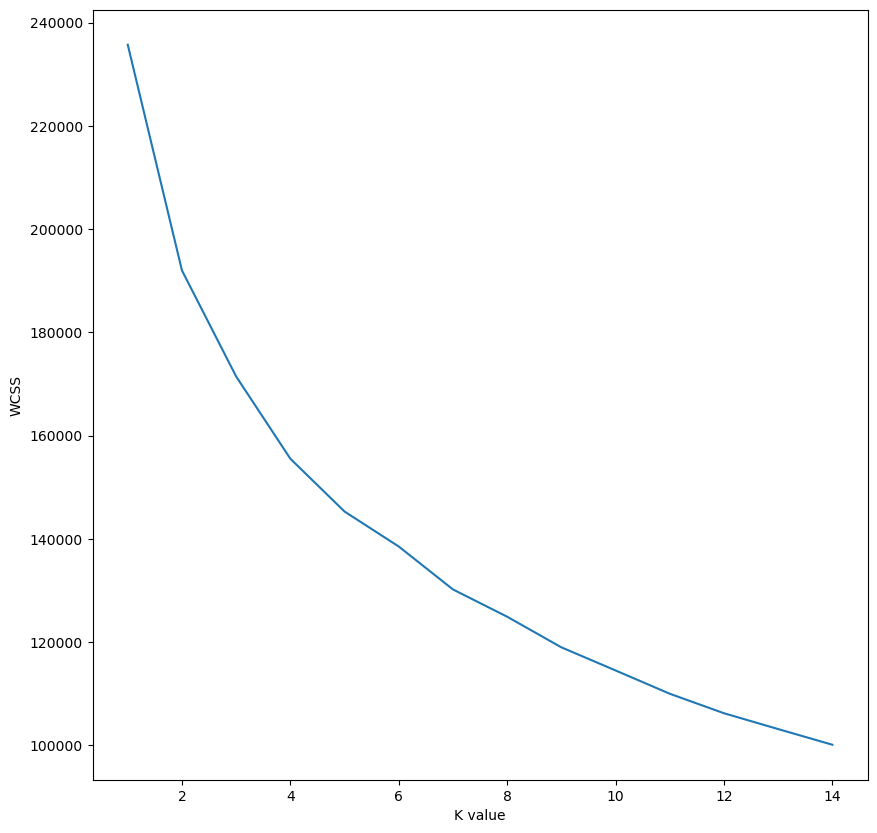

In [28]:
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares

for k in range(1, 15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(df)
    wcss.append(kmeansForLoop.inertia_)

plt.figure(figsize = (10, 10))
plt.plot(range(1, 15), wcss)
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

### Elbow Method:-
#### It's often a good practice to compare the inertia values for different values of k to find an optimal number of clusters. The "elbow method" involves plotting the inertia for different values of k and looking for an "elbow" point where the rate of decrease in inertia slows down. This can help in choosing an appropriate number of clusters.


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:8

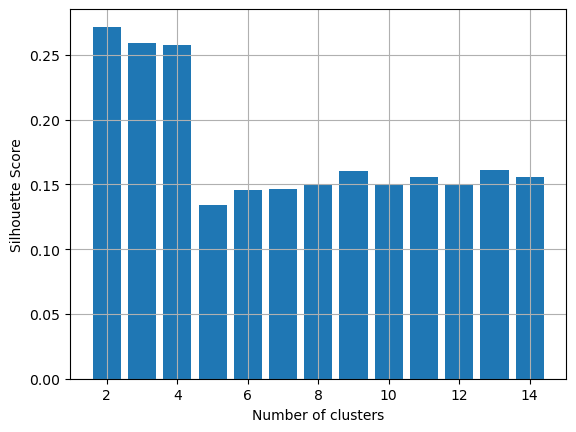

In [29]:
from sklearn.metrics import silhouette_score
silhouette_scores = [] 

for n_cluster in range(2,15):
    silhouette_scores.append( 
        silhouette_score(df, KMeans(n_clusters = n_cluster).fit_predict(df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.grid()
plt.show() 

### K means Clustering (Computing Silhouette score):-

#### We performed the silhouette analysis to determine the optimal number of clusters (k) for our dataset using the kmeans clustering algorithm. The silhouette score measures how similar an object is to its cluster compared to other clusters. A higher silhouette score indicates betterdefined clusters.

#### Silhouette scores were computed for a range of cluster values (from 2 to 14 in our case). The silhouette score indicates the quality of clustering for each k.

#### Plot Each bar on the graph represented the silhouette score for a specific number of clusters (k), whereas the height of the bars reflected the silhouette score's magnitude.

#### The bar graph suggests that k=2 has the highest silhouette score. A higher silhouette score generally indicates betterdefined clusters. Optimal K Based on the silhouette scores, we identified that k = 2 is the optimal number of clusters for our dataset. Therefore, we proceeded with k=2 for our kmeans clustering algorithm.


---

In [30]:
kmeans = KMeans(n_clusters = 2)
clusters = kmeans.fit_predict(df)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [31]:
clusters

array([0, 0, 0, ..., 1, 1, 1])

In [32]:
df["Cluster"] = clusters

In [33]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Cluster
0,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.31024,10,-1.239776,-0.794017,-0.896370,-0.765321,1,0,0
1,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.595451,-0.450137,1.268054,-0.318962,-0.31024,10,-0.136980,-0.209237,-0.896370,-0.516347,1,0,0
2,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.31024,10,2.068612,-0.794017,2.433853,-0.267374,1,0,0
3,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.627404,0.654748,2.134590,-0.318962,-0.31024,10,0.965816,-0.209237,-0.480092,-0.018400,1,0,0
4,-0.702302,-0.460019,-0.398824,-0.246257,-0.494387,-0.301889,-0.008183,0.184884,-0.318962,-0.31024,10,0.965816,0.375543,-0.896370,-0.018400,1,1,0


### Observation : Here two clusters are formed, Cluster1 and Cluster2. Cluster1 represented by 0 are Customers who donot buy any product and Cluster2 represented by 1 are Customers who buy any particular product. 

---

In [34]:
df_2=pd.read_csv("C://Users//HP//Documents//Final Project DA//online_shoppers_intention.csv")

In [35]:
#Droping Duplicate Values

df_2.drop_duplicates(inplace=True)

In [36]:
df_2.shape

(12205, 18)

In [37]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Cluster
0,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.31024,10,-1.239776,-0.794017,-0.896370,-0.765321,1,0,0
1,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.595451,-0.450137,1.268054,-0.318962,-0.31024,10,-0.136980,-0.209237,-0.896370,-0.516347,1,0,0
2,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.31024,10,2.068612,-0.794017,2.433853,-0.267374,1,0,0
3,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.627404,0.654748,2.134590,-0.318962,-0.31024,10,0.965816,-0.209237,-0.480092,-0.018400,1,0,0
4,-0.702302,-0.460019,-0.398824,-0.246257,-0.494387,-0.301889,-0.008183,0.184884,-0.318962,-0.31024,10,0.965816,0.375543,-0.896370,-0.018400,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.198517,0.356953,-0.398824,-0.246257,0.469915,0.300496,-0.292296,-0.269384,0.337328,-0.31024,4,2.068612,2.129885,-0.896370,-0.765321,1,1,1
12326,-0.702302,-0.460019,-0.398824,-0.246257,-0.606516,-0.386155,-0.450137,-0.436133,-0.318962,-0.31024,2,0.965816,-0.209237,-0.896370,0.977494,1,1,1
12327,-0.702302,-0.460019,-0.398824,-0.246257,-0.584090,-0.532806,1.391338,0.979209,-0.318962,-0.31024,2,0.965816,-0.209237,-0.896370,2.222363,1,1,1
12328,0.498791,-0.037447,-0.398824,-0.246257,-0.382259,-0.448540,-0.450137,-0.442214,-0.318962,-0.31024,2,-0.136980,-0.209237,-0.063814,1.724415,1,0,1


In [38]:
df_2

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [39]:
labels = kmeans.fit_predict(df)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [40]:
df_2['Cluster_No']=labels

In [41]:
df_2.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Cluster_No
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0


In [42]:
#Label Encoding

le1=LabelEncoder()

df_2['Revenue_Enc']=le.fit_transform(df_2['Revenue'])

In [43]:
df_2.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Cluster_No,Revenue_Enc
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0,0
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0,0


In [44]:
pd.crosstab(df_2['Cluster_No'], df_2['Revenue'])

Revenue,False,True
Cluster_No,,
0,1953,375
1,8344,1533


### Cross tab:-

#### The obtained crosstabulation showed the distribution of instances across two columns: 'Cluster_No' and 'Revenue.' The data was clustered using the KMeans algorithm into two clusters ('Cluster_No' 0 and 1), and the distribution of the 'Revenue' variable within each cluster was shown. 

#### Cluster 0`False`: 1953 instances, `True`: 375 instances
#### Cluster 1 `False`: 8344 instances, `True`: 1533 instances
#### We could observe the distribution of revenue (True or False) within each cluster.

#### This analysis helped us understand how well the clustering aligned with revenue generation. For instance, if Cluster 1 has a higher proportion of instances with 'True' revenue, it suggests that this cluster may contain customers who are more likely to make a purchase.


In [45]:
round(kmeans.inertia_,2)

192004.96

### The `inertia_` attribute in scikitlearn's KMeans implementation represents the sum of squared distances of samples to their closest cluster center.

#### In our case, the value (192004.96) indicated the sum of squared distances of data points to their respective cluster centres in our kmeans clustering with k=2. The inertia value provides a measure of how well the data points within each cluster are grouped around the cluster's center. Lower values of inertia are generally better, as they indicate tighter and more compact clusters.


In [46]:
# checking how many of the samples were correctly labeled

correct_labels = sum(df_2['Cluster_No'] == df_2['Revenue_Enc'])

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, labels.size))

Result: 3486 out of 12205 samples were correctly labeled.


### Checking how many of the samples were correctly labelled:-

#### The output suggested  that out of the 12205 samples, 3486 were correctly labelled based on the comparison of 'Cluster_No' and 'Revenue_Enc'.